In [179]:
import pandas as pd 
import numpy as np 

In [180]:
df = pd.read_csv("../Bank loan eligibility prediction/train_u6lujuX_CVtuZ9i.csv")
# loan_data2 = pd.read_csv("../Bank loan eligibility prediction/test_Y3wMUE5_7gLdaTN.csv")
# print(loan_data2.head())
df.tail()
# loan_data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [181]:
# combined_df = pd.concat([loan_data, loan_data2], ignore_index=True)
# combined_df.tail()

In [182]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

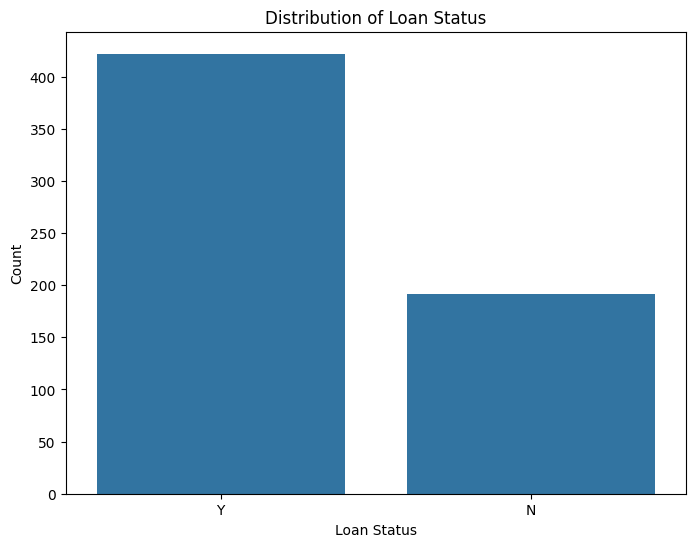

In [183]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))  
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')    
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()



In [184]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [185]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [186]:
df.select_dtypes(include=['object']).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [187]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [188]:
from sklearn.impute import SimpleImputer

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History']
cat_cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Property_Area', 'Loan_Status']

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols)
df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols)

In [189]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']
ord_encoder = OrdinalEncoder()
transformed = ColumnTransformer(
    
    transformers =  [("ord_encoder",
                       ord_encoder,
                         categorical_features)],
                           remainder='passthrough')

transformed_x = transformed.fit_transform(df.drop('Loan_Status', axis=1))
transformed_x

array([[  0.,   1.,   0., ..., 128., 360.,   1.],
       [  1.,   1.,   1., ..., 128., 360.,   1.],
       [  2.,   1.,   1., ...,  66., 360.,   1.],
       ...,
       [611.,   1.,   1., ..., 253., 360.,   1.],
       [612.,   1.,   1., ..., 187., 360.,   1.],
       [613.,   0.,   0., ..., 133., 360.,   0.]])

In [190]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5849.0,0.0,128.0,360.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0
2,2.0,1.0,1.0,0.0,0.0,1.0,2.0,3000.0,0.0,66.0,360.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2.0,2583.0,2358.0,120.0,360.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,2.0,6000.0,0.0,141.0,360.0,1.0


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y = df[['Loan_Status']].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=42)

In [202]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [203]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_decision_tree = accuracy_score(y_test, clf.predict(x_test))
accuracy_decision_tree

0.7398373983739838

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = df[['Loan_Status']].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=42)

In [205]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [206]:
y_pred = model.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [207]:
accuracy_random_forest = accuracy_score(y_test, y_pred)
accuracy_random_forest

0.7804878048780488